In [4]:
PATH = "dataset.csv"

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from tqdm import trange
from gensim import corpora, models

from sklearn.feature_extraction.text import CountVectorizer

In [6]:
data = pd.read_csv(PATH)

In [7]:
def convert_to_binary(rating):
    if rating > 3:
        return "Positive"
    elif rating <3:
        return "Negative"
    else:
        return "Neutral"

In [8]:
data['Rating'] = data['Rating'].apply(convert_to_binary)

In [9]:
data['Rating'].describe()

count        20491
unique           3
top       Positive
freq         15093
Name: Rating, dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  object
dtypes: object(2)
memory usage: 320.3+ KB


In [11]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

<Axes: ylabel='Rating'>

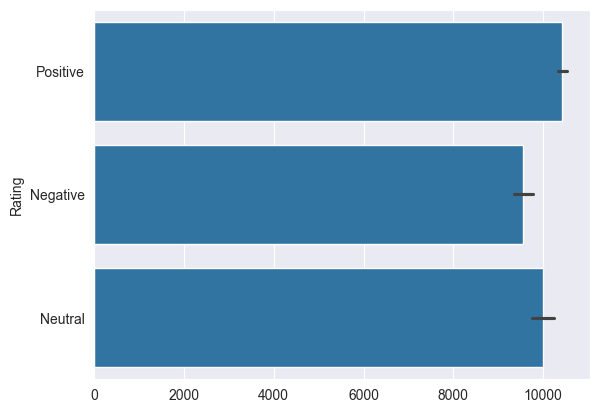

In [12]:
sns.barplot(data['Rating'])

In [13]:
data['Rating'].value_counts()

Rating
Positive    15093
Negative     3214
Neutral      2184
Name: count, dtype: int64

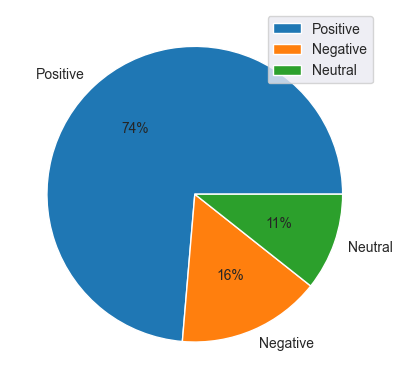

In [14]:
plt.pie(data['Rating'].value_counts(),labels=["Positive", "Negative", "Neutral"],autopct='%1.0f%%')
plt.legend()
plt.show()


In [15]:
def text_preprocessing(a):
  a=re.sub('[^a-zA-Z ]','',a)
  a=a.lower().split()
  wn=WordNetLemmatizer()
  sw = stopwords.words('english')
  clean_word=[wn.lemmatize(i) for i in a if not i in sw]
  sen=' '.join(clean_word)
  return sen

In [16]:
data['preprocessing'] = data['Review'].apply(text_preprocessing)

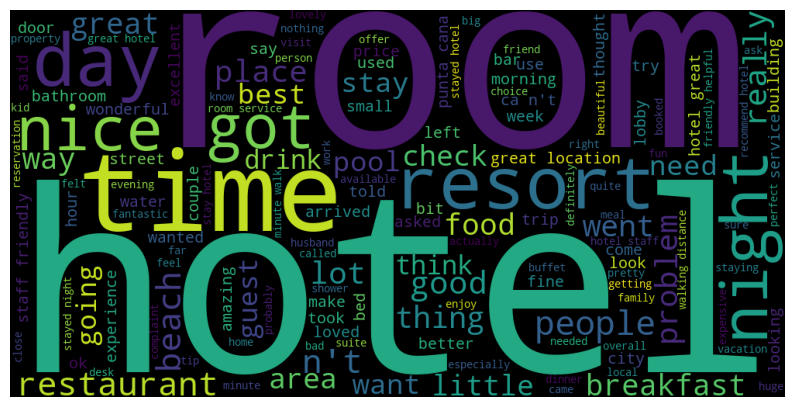

In [17]:
wc = WordCloud(width=1000, height=500 , min_font_size=12)
wc.generate(''.join(data['Review']))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [18]:
def corpus(text):
    text_list = text.split()
    return text_list

In [19]:
data['Review_lists'] = data['preprocessing'].apply(corpus)
data.head(10)

,Review,Rating,preprocessing,Review_lists
0,nice hotel expensive parking got good deal sta...,Positive,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,Negative,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,Neutral,nice room experience hotel monaco seattle good...,"[nice, room, experience, hotel, monaco, seattl..."
3,"unique, great stay, wonderful time hotel monac...",Positive,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",Positive,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game..."
5,love monaco staff husband stayed hotel crazy w...,Positive,love monaco staff husband stayed hotel crazy w...,"[love, monaco, staff, husband, stayed, hotel, ..."
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,cozy stay rainy city husband spent night monac...,"[cozy, stay, rainy, city, husband, spent, nigh..."
7,"excellent staff, housekeeping quality hotel ch...",Positive,excellent staff housekeeping quality hotel cho...,"[excellent, staff, housekeeping, quality, hote..."
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,hotel stayed hotel monaco cruise room generous...,"[hotel, stayed, hotel, monaco, cruise, room, g..."
9,excellent stayed hotel monaco past w/e delight...,Positive,excellent stayed hotel monaco past delight rec...,"[excellent, stayed, hotel, monaco, past, delig..."


In [20]:
corpus = []
for i in trange(data.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += data['Review_lists'][i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 140000.53it/s]


2009961

In [21]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('hotel', 52957),
 ('room', 46378),
 ('great', 21098),
 ('nt', 19007),
 ('good', 17054),
 ('staff', 16280),
 ('stay', 15341),
 ('night', 14084),
 ('day', 12961),
 ('time', 12611)]

In [22]:
words = [word for word, freq in mostCommon]
frequencies = [freq for word, freq in mostCommon]

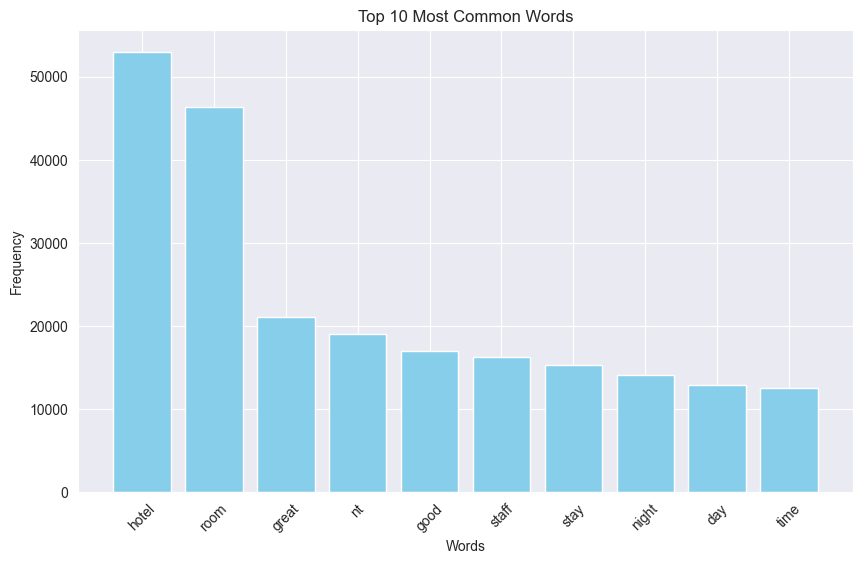

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [25]:
texts = data['Review_lists'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=10,passes=10)

for i, topic in lda_model.show_topics(num_topics=10, num_words=10, formatted=False):
    print(f"Topic {i+1}: {' '.join([word[0] for word in topic])}")


Topic 1: hk conrad justice karaoke overwhelming repetitive faster moneythe awkward quietly
Topic 2: stank core soiled accessable staffwe width convience caesar complimented mahalo
Topic 3: mate gbp intersection dissappointed obliging murano styled monte carlo bead
Topic 4: upside spaciousness garment refundable friendship merit fizzy beacuse beachwe equidistant
Topic 5: service staff wedding experience hotel guest stay club best special
Topic 6: water day nt room bar food restaurant like drink good
Topic 7: hotel room good nt night bathroom bed nice staff stay
Topic 8: hotel great room location stay staff breakfast clean stayed nice
Topic 9: beach resort pool great food time good nt day people
Topic 10: room hotel nt told desk night day stay time said
